#  Tic-Tac-Toe Agent
  ​In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd   numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty   cell. The following is the layout of the notebook:

    - Defining epsilon-greedy strategy
    - Tracking state-action pairs for convergence
    - Define hyperparameters for the Q-learning algorithm
    - Generating episode and applying Q-update equation
    - Checking convergence in Q-values

Loading the Enviornment file

In [1]:
# %load TCGame_Env1.py
from gym import spaces
import numpy as np
import random
from itertools import groupby
from itertools import product



class TicTacToe():

    def __init__(self):
        """initialise the board"""
        #print("INIT Called")
        # initialise state as an array
        self.state = [np.nan for _ in range(9)]  # initialises the board position, can initialise to an array or matrix
       # print(self.state)
        # all possible numbers
        self.all_possible_numbers = [i for i in range(1, len(self.state) + 1)] # , can initialise to an array or matrix
       # print(self.all_possible_numbers)
        self.reset()


    def is_winning(self, curr_state):
        winningLines = [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8), (0,4,8), (2,4,6)]
        for line in winningLines:
                if (np.isnan(curr_state[line[0]])  or np.isnan(curr_state[line[1]])  or np.isnan(curr_state[line[2]])):
                    return False
                line_state = curr_state[line[0]] + curr_state[line[1]] + curr_state[line[2]]
                if line_state == 15:
                    return True
                else:
                    return False


    def is_terminal(self, curr_state):
        # Terminal state could be winning state or when the board is filled up

        if self.is_winning(curr_state) == True:
            return True, 'Win'

        elif len(self.allowed_positions(curr_state)) ==0:
            return True, 'Tie'

        else:
            return False, 'Resume'


    def allowed_positions(self, curr_state):
        """Takes state as an input and returns all indexes that are blank"""
        return [i for i, val in enumerate(curr_state) if np.isnan(val)]


    def allowed_values(self, curr_state):
        """Takes the current state as input and returns all possible (unused) values that can be placed on the board"""

        used_values = [val for val in curr_state if not np.isnan(val)]
        agent_values = [val for val in self.all_possible_numbers if val not in used_values and val % 2 !=0]
        env_values = [val for val in self.all_possible_numbers if val not in used_values and val % 2 ==0]

        return (agent_values, env_values)


    def action_space(self, curr_state):
        """Takes the current state as input and returns all possible actions, i.e, all combinations of allowed positions and allowed values"""

        agent_actions = product(self.allowed_positions(curr_state), self.allowed_values(curr_state)[0])
        #print('agent_actions ',agent_actions)
        env_actions = product(self.allowed_positions(curr_state), self.allowed_values(curr_state)[1])
        #print('env_actions ',env_actions)
        return (agent_actions, env_actions)



    def state_transition(self, curr_state, curr_action):
        """Takes current state and action and returns the board position just after agent's move.
        Example: Input state- [1, 2, 3, 4, nan, nan, nan, nan, nan], action- [7, 9] or [position, value]
        Output = [1, 2, 3, 4, nan, nan, nan, 9, nan]
        """
        curr_state[curr_action[0]] = curr_action[1]
        return curr_state

    def step(self, curr_state, curr_action):
        """Takes current state and action and returns the next state, reward and whether the state is terminal. Hint: First, check the board position after
        agent's move, whether the game is won/loss/tied. Then incorporate environment's move and again check the board status.
        Example: Input state- [1, 2, 3, 4, nan, nan, nan, nan, nan], action- [7, 9] or [position, value]
        Output = ([1, 2, 3, 4, nan, nan, nan, 9, nan], -1, False)"""
        final_state = False
        inter_state = self.state_transition(curr_state, curr_action)
        final_state, game_status = self.is_terminal(inter_state)
        #print("final_state, game_status ",final_state, game_status)
        if(final_state == True):
            if game_status == 'Win':
                reward = 10
            else: 
                reward = 0
        else:
            pos = random.choice(self.allowed_positions(inter_state))
            val = random.choice(self.allowed_values(inter_state)[1])
            inter_state[pos]= val
            final_state, game_status = self.is_terminal(inter_state)
            if final_state == True:
                if game_status == 'Win':
                    reward=-10
                else:
                    reward=0
            else:
                reward=-1      
        
        return inter_state, reward, final_state
    
    def reset(self):
        return self.state


In [2]:
%run -i "TCGame_Env1.py"

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [3]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe() # call the environment

In [4]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [7]:
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [8]:
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [9]:
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [10]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [11]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))] 
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
  
  
  

In [12]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [13]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [14]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [15]:
EPISODES = 50000
LR = 0.01                   # learning rate
GAMMA = 0.8                # discount factor

max_epsilon = 1.0
min_epsilon =  0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [16]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting rewar
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 300th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

#### Check the Q-dictionary

In [17]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0059025602370861,
              (0, 3): -1.005907082252384,
              (0, 5): -1.0058975655170266,
              (0, 7): -1.0059034830467326,
              (0, 9): -1.0059130161106467,
              (1, 1): -1.005904823530194,
              (1, 3): -1.0059128509343502,
              (1, 5): -1.0059038371197933,
              (1, 7): -1.0058961476815915,
              (1, 9): -1.005895532828301,
              (2, 1): -1.0059128654194507,
              (2, 3): -1.0059065491211152,
              (2, 5): -1.0058975485454764,
              (2, 7): -1.0058980360706076,
              (2, 9): -1.0059040395218195,
              (3, 1): -1.0059009471712916,
              (3, 3): -1.0059077916889865,
              (3, 5): -1.0058963701950139,
              (3, 7): -1.0058952196875162,
              (3, 9): -1.005906628672689,
              (4, 1): -1.0059050344687324,
              (4, 3): -1.0059060658541332,
              (4, 5

In [18]:
len(Q_dict)

137437

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [19]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(*args, **kw)>

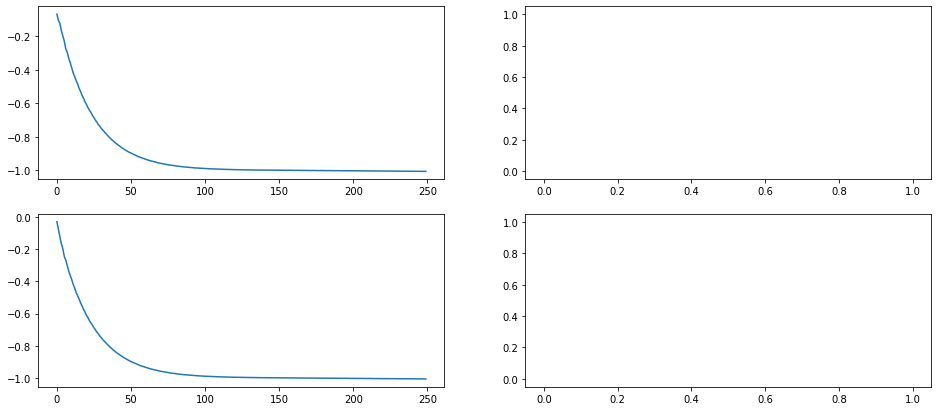

In [20]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(8,2)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(8,2)]))
plt.show

### Epsilon - decay check

In [21]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

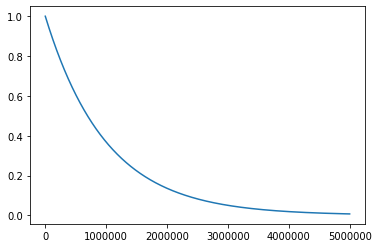

In [22]:
plt.plot(time, epsilon)
plt.show()